In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler, Normalizer, StandardScaler, RobustScaler
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix

%matplotlib inline

In [25]:
# Read in data frame from EDA
df = pd.read_pickle('df_ready1')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 3 to 3194
Data columns (total 63 columns):
State FIPS Code                                                         2814 non-null object
County FIPS Code                                                        2814 non-null object
5-digit FIPS Code                                                       2814 non-null object
State Abbreviation                                                      2814 non-null object
Name                                                                    2814 non-null object
County Ranked (Yes=1/No=0)                                              2814 non-null object
Premature death raw value                                               2814 non-null object
Poor or fair health raw value                                           2814 non-null float64
Poor physical health days raw value                                     2814 non-null float64
Poor mental health days raw value                     

In [27]:
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,...,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
3,01,001,01001,AL,Autauga County,1,8824.0571232,0.184111,4.200578,4.306739,...,0.151196,0.192545,0.004756,0.012792,0.001045,0.028575,0.744739,0.008285,0.513422,0.420022
4,01,003,01003,AL,Baldwin County,1,7224.6321603,0.180605,4.098748,4.249649,...,0.199470,0.089532,0.007760,0.011565,0.000687,0.045502,0.830474,0.004545,0.514528,0.422791
5,01,005,01005,AL,Barbour County,1,9586.165037,0.257734,5.067438,4.634994,...,0.188247,0.479422,0.006529,0.004630,0.001860,0.042066,0.459557,0.011993,0.472299,0.677896
6,01,007,01007,AL,Bibb County,1,11783.543675,0.199969,4.363377,4.315710,...,0.160226,0.214576,0.004279,0.002206,0.001147,0.026381,0.742986,0.003943,0.464531,0.683526
7,01,009,01009,AL,Blount County,1,10908.101822,0.210953,4.512753,4.701599,...,0.178426,0.014600,0.006326,0.003017,0.001172,0.095651,0.869443,0.018700,0.506886,0.899515


In [28]:
# View all column topics
list(df.columns)

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State Abbreviation',
 'Name',
 'County Ranked (Yes=1/No=0)',
 'Premature death raw value',
 'Poor or fair health raw value',
 'Poor physical health days raw value',
 'Poor mental health days raw value',
 'Adult smoking raw value',
 'Adult obesity raw value',
 'Food environment index raw value',
 'Physical inactivity raw value',
 'Access to exercise opportunities raw value',
 'Excessive drinking raw value',
 'Alcohol-impaired driving deaths raw value',
 'Uninsured raw value',
 'Dentists raw value',
 'Preventable hospital stays raw value',
 'Mammography screening raw value',
 'Flu vaccinations raw value',
 'High school graduation raw value',
 'Some college raw value',
 'Unemployment raw value',
 'Children in poverty raw value',
 'Income inequality raw value',
 'Children in single-parent households raw value',
 'Social associations raw value',
 'Air pollution - particulate matter raw value',
 'Drinking water violations raw v

In [29]:
df['target'] = 0 # create a target column

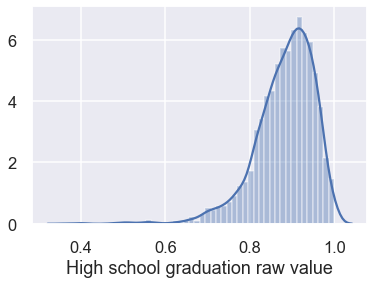

In [30]:
# Looking at the target variable distribution
sns.distplot(df['High school graduation raw value'])

(array([   3.,    2.,    6.,    6.,   19.,   87.,  214.,  723., 1099.,
         655.]),
 array([0.3630137 , 0.42671233, 0.49041096, 0.55410959, 0.61780822,
        0.68150685, 0.74520548, 0.80890411, 0.87260274, 0.93630137,
        1.        ]),
 <a list of 10 Patch objects>)

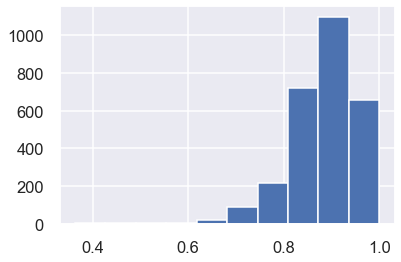

In [31]:
plt.hist(df['High school graduation raw value'])

In [32]:
# Setting mock federal standard for a highschool grad rate of at least 90%
df.loc[df['High school graduation raw value'] >= 0.9, 'target'] = 1  # Meeting standard

df.loc[df['High school graduation raw value'] <0.9, 'target'] = 0  # Failing to meet standard



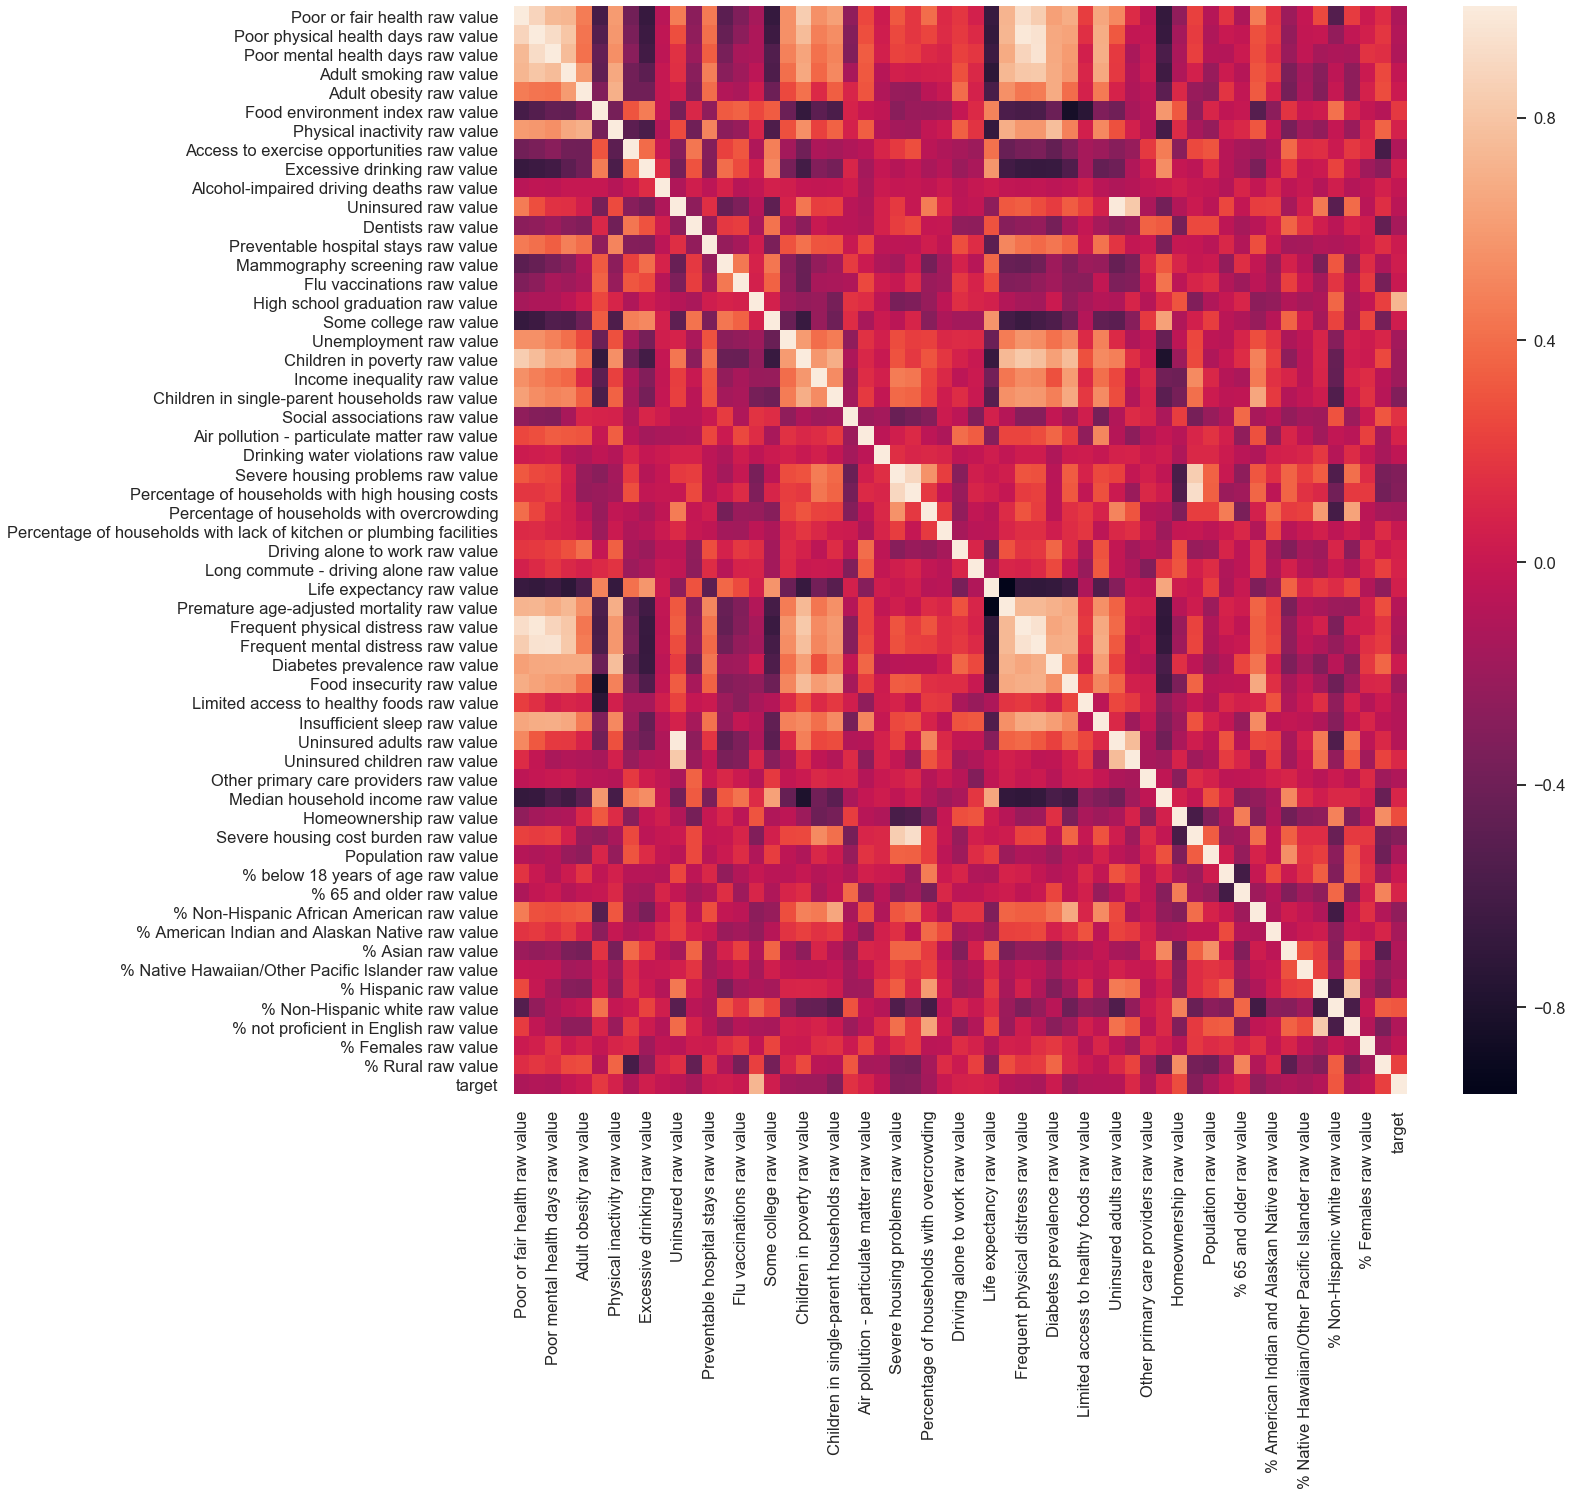

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [ ]:
0.21697799347796504, % rural 
 0.2719691482359243, Home ownership
 0.31094167052019217, % Non-Hispanic white raw value
 0.7300252065326511
    
 -0.32083586573184425, Children in single-parent households raw value
 -0.31468499753911716, Severe housing problems raw value
 -0.30586254195786583, Percentage of households with high housing costs
 -0.3017989466551982,
 -0.24732405190486392,

In [90]:
df.corr()[df.corr()['target'] == -0.30586254195786583]

,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,...,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value,target
Percentage of households with high housing costs,0.179709,0.177796,0.21235,0.041881,-0.230211,-0.207124,-0.171708,0.280687,-0.026531,-0.004409,...,0.37322,-0.044272,0.363384,0.152582,0.11189,-0.385083,0.190879,0.193294,-0.382717,-0.305863


In [34]:
df.corr()

,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,...,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value,target
Poor or fair health raw value,1.000000,0.878801,0.744368,0.726499,0.462766,-0.592937,0.600402,-0.383742,-0.668137,-0.069254,...,0.460310,0.159925,-0.192866,-0.013581,0.252089,-0.526736,0.204668,0.016288,0.129470,-0.117236
Poor physical health days raw value,0.878801,1.000000,0.918575,0.807517,0.434351,-0.527775,0.580096,-0.351897,-0.650360,-0.035508,...,0.284450,0.193063,-0.236115,-0.023684,-0.004908,-0.235156,-0.027721,0.055813,0.176699,-0.094063
Poor mental health days raw value,0.744368,0.918575,1.000000,0.759394,0.419075,-0.447015,0.541855,-0.280632,-0.616353,-0.040234,...,0.267124,0.141413,-0.204566,-0.024244,-0.148833,-0.115947,-0.137634,0.160337,0.143533,-0.108632
Adult smoking raw value,0.726499,0.807517,0.759394,1.000000,0.595126,-0.461782,0.660938,-0.383809,-0.482819,-0.006686,...,0.302138,0.208616,-0.340050,-0.154003,-0.285027,-0.045828,-0.255960,0.018622,0.252783,-0.023481
Adult obesity raw value,0.462766,0.434351,0.419075,0.595126,1.000000,-0.318802,0.697498,-0.394099,-0.397771,-0.005061,...,0.323747,0.074681,-0.373937,-0.145916,-0.299240,-0.003475,-0.254401,0.071615,0.270408,0.019938
Food environment index raw value,-0.592937,-0.527775,-0.447015,-0.461782,-0.318802,1.000000,-0.367152,0.304014,0.464623,-0.007105,...,-0.517735,-0.266778,0.162222,0.012178,0.030577,0.419241,0.085527,-0.016617,-0.082065,0.185029
Physical inactivity raw value,0.600402,0.580096,0.541855,0.660938,0.697498,-0.367152,1.000000,-0.484713,-0.573041,-0.080190,...,0.310805,-0.005636,-0.359596,-0.172581,-0.234807,-0.013670,-0.200860,0.087902,0.363888,0.068713
Access to exercise opportunities raw value,-0.383742,-0.351897,-0.280632,-0.383809,-0.394099,0.304014,-0.484713,1.000000,0.395038,0.001339,...,-0.185941,-0.106035,0.382014,0.128110,0.136749,0.017892,0.184858,0.120179,-0.594195,-0.113876
Excessive drinking raw value,-0.668137,-0.650360,-0.616353,-0.482819,-0.397771,0.464623,-0.573041,0.395038,1.000000,0.128864,...,-0.350682,-0.053605,0.197250,-0.006005,0.015247,0.235388,0.028441,-0.181123,-0.275585,0.045189
Alcohol-impaired driving deaths raw value,-0.069254,-0.035508,-0.040234,-0.006686,-0.005061,-0.007105,-0.080190,0.001339,0.128864,1.000000,...,-0.022820,0.098919,-0.041354,0.003047,-0.087926,0.048962,-0.088166,-0.035467,0.063009,-0.021106


In [35]:
df['target'].value_counts().sort_index()

0    1496
1    1318
Name: target, dtype: int64

In [92]:
len(df.columns)

64

In [36]:
# Making predictors and predictions
X = df.iloc[:, 6:]

In [37]:
# Making features and target
X.drop(columns=['High school graduation raw value', 'target'], inplace=True)
X = X.values
y = df['target'].values

In [38]:
# train, test, split variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [39]:
# Scaling data
standard = StandardScaler()
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled = standard.fit_transform(X_test)
X_scaled = standard.fit_transform(X)

In [40]:
# PCA components for training data
pca = PCA(0.99)
X_pca_train = pca.fit_transform(X_train_scaled)

PC1_train, PC2_train = X_pca_train[:, 0], X_pca_train[:, 1]



In [41]:
# PCA components for testing data
pca = PCA(0.99)
X_pca_test = pca.fit_transform(X_test_scaled)

PC1_test, PC2_test = X_pca_test[:, 0], X_pca_test[:, 1]


In [42]:
# PCA components for all data
pca = PCA(0.99)
X_pca = pca.fit_transform(X_scaled)

# Grabbing the first two PCs
PC1, PC2 = X_pca[:, 0], X_pca[:, 1]


In [43]:
pca_length = len(pca.explained_variance_ratio_.cumsum())

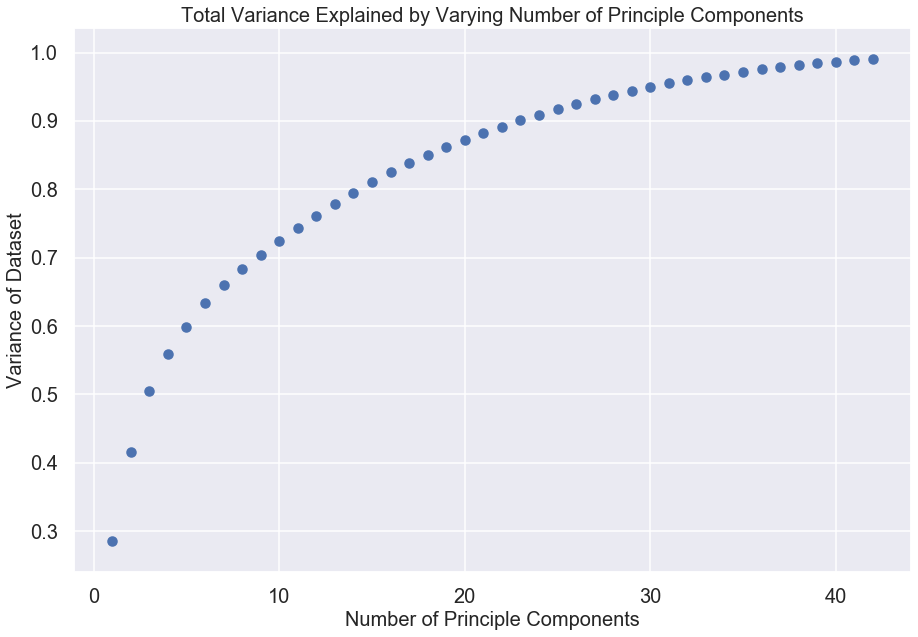

In [93]:
# Plot PCA CDF
plt.figure(figsize=(15,10))
plt.scatter(range(1,pca_length+1), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principle Components', fontsize=20);
plt.xlabel('Number of Principle Components', fontsize=20)
plt.ylabel('Variance of Dataset', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('PCA1_raw_data.png')

In [45]:
pca.explained_variance_ratio_.cumsum()[:42] # the first 42 PC's capture 99% of data

array([0.28511022, 0.41529116, 0.50510692, 0.55887482, 0.59829165,
       0.63336589, 0.65966897, 0.68356388, 0.70419218, 0.72387991,
       0.74337356, 0.76167065, 0.77908316, 0.79514415, 0.81032313,
       0.82466528, 0.83775027, 0.85011977, 0.86124768, 0.8721881 ,
       0.88203296, 0.89165498, 0.90082107, 0.90921115, 0.91716529,
       0.9245435 , 0.93139292, 0.93814322, 0.94434077, 0.9501076 ,
       0.95497222, 0.95960744, 0.96388261, 0.96783441, 0.97164145,
       0.9752804 , 0.97842332, 0.98142015, 0.98414984, 0.98664598,
       0.98899019, 0.99113443])

In [46]:
# Creating a PCA dataframe with all data to observe how it splits the groups
# This is needed for the following plot
PCA_df = pd.DataFrame(X_pca)
y = pd.Series(y)


In [47]:
PCA_df['target'] = y
col_labels = ['PC' + str(x) for x in range(1,43)]
col_labels.append('target')
PCA_df.columns = col_labels
PCA_df['target'] = PCA_df['target'].astype('int')

In [48]:
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,target
0,1.225455,-0.592249,-2.057788,-1.744255,0.851220,-0.543019,0.946371,0.086140,-0.043791,-0.046675,...,-0.032144,0.112357,-0.214886,-0.466523,0.244449,-0.177653,0.034748,-0.188026,-0.197052,1
1,-1.139647,-0.132044,-1.613051,-0.733655,-0.749346,0.153310,-0.303816,1.059109,-1.295496,-0.101730,...,0.181366,0.309521,-0.086190,-0.361514,-0.207823,-0.081647,-0.101893,-0.135956,-0.146207,0
2,7.495543,0.729164,-1.833153,0.422528,-0.171613,-2.202490,0.860262,-2.430310,-0.985790,0.069543,...,-0.780535,0.729629,-0.069542,0.383126,-0.046955,-0.640849,0.494529,-0.173417,0.281804,0
3,3.266068,-2.945267,-1.479683,-1.981063,0.001725,-0.543432,0.732108,-1.493161,0.687891,1.431809,...,0.503011,0.178316,-0.581392,-0.382578,0.322463,-0.159649,-0.238759,-0.029738,0.416205,0
4,2.245427,-2.880771,-0.096666,-3.295468,-1.253140,0.874892,0.494026,0.862430,0.473495,0.301224,...,-0.013054,0.359749,0.228112,-0.290534,-0.282478,0.421464,0.205084,-0.257438,0.246369,1


In [49]:
target = PCA_df['target']

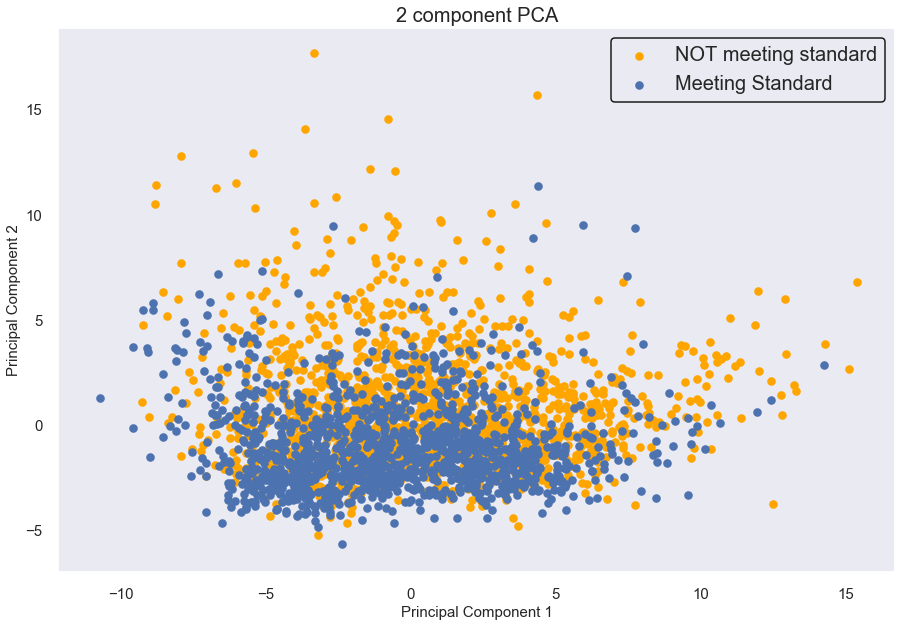

In [94]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
targets = [0, 1]
labels = ['NOT meeting standard', 'Meeting Standard']
colors = ['orange', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = PCA_df['target'] == target
    ax.scatter(PCA_df.loc[indicesToKeep, 'PC1']
               , PCA_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(labels, fontsize=20, frameon=True, framealpha=1, edgecolor='k')
ax.grid()
plt.savefig('PCA2_first_two_comps_plot.png')

# Random Forest



In [55]:
# First running a random forest on our actual data
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
accuracy_score(y_test, y_pred)

0.6927175843694494

In [57]:
confusion_matrix(y_test, y_pred)

array([[227,  68],
       [105, 163]])

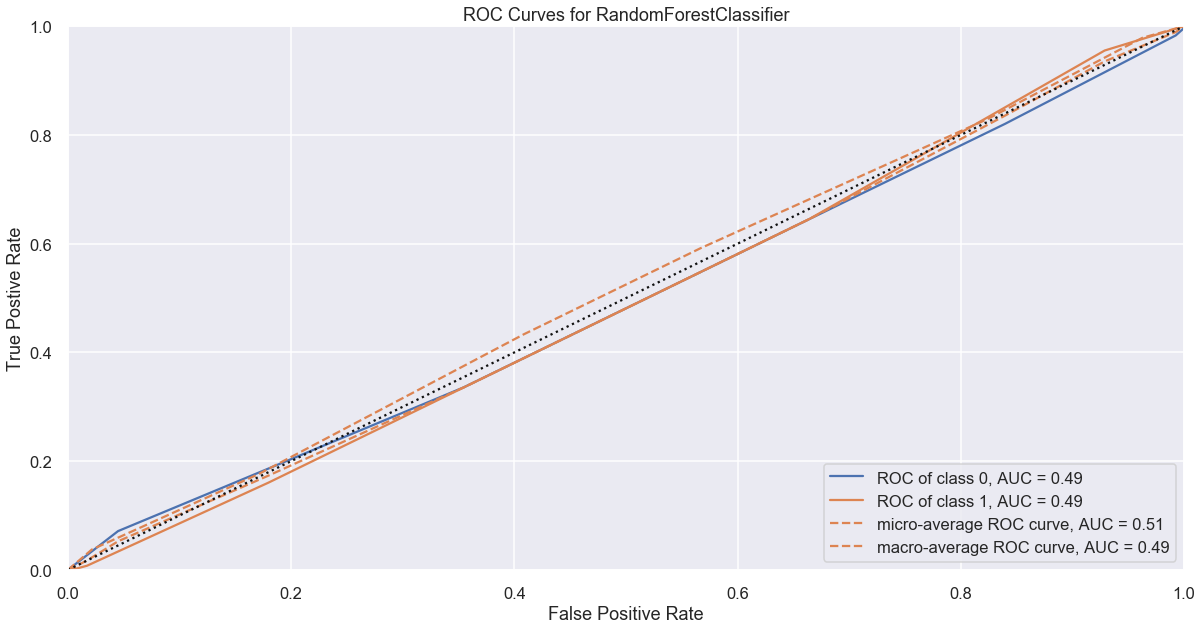

In [58]:
# Instantiate the visualizer with the classification model
plt.figure(figsize=(20,10))
visualizer = ROCAUC(clf)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof() 

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       295
           1       0.71      0.61      0.65       268

    accuracy                           0.69       563
   macro avg       0.69      0.69      0.69       563
weighted avg       0.69      0.69      0.69       563



In [64]:
X_pca_train_random_forest = X_pca_train[:, :-1]

In [65]:
# Trying again, but this time with PC's
# X_pca_train has 42 columns while X_pca_test has 41. 
# This throws an error.
# Dropping one of the PC's from X_pca_train to geet around this

clf = RandomForestClassifier()
clf.fit(X_pca_train_random_forest, y_train)
y_pred = clf.predict(X_pca_test)


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


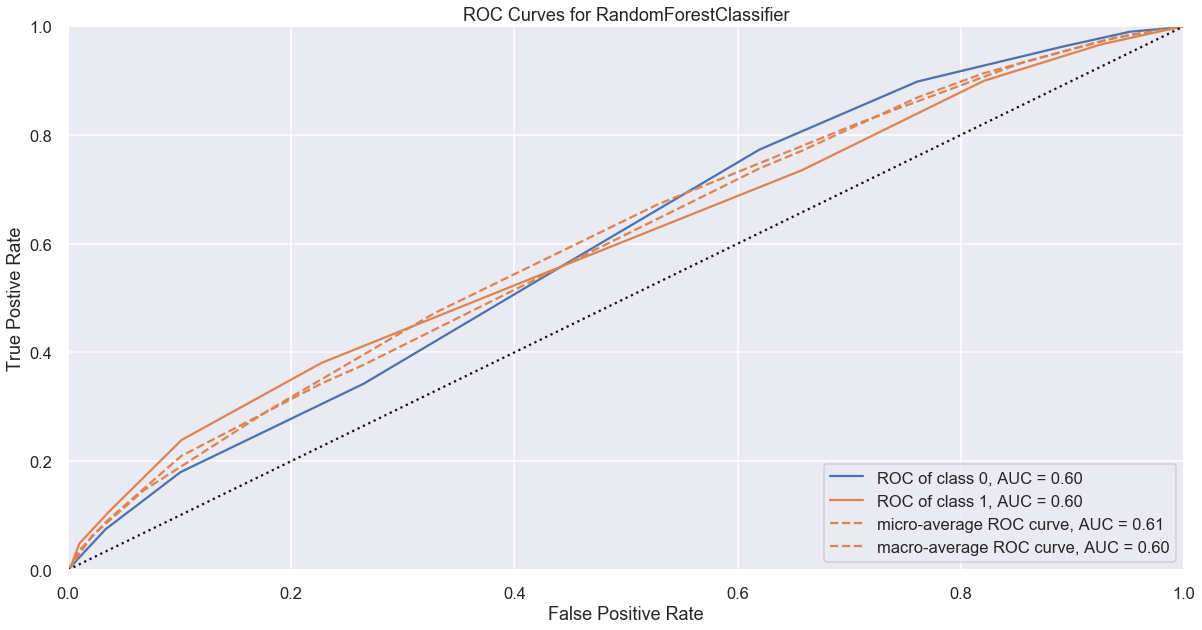

In [66]:
plt.figure(figsize=(20,10))
visualizer = ROCAUC(clf)
visualizer.score(X_pca_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

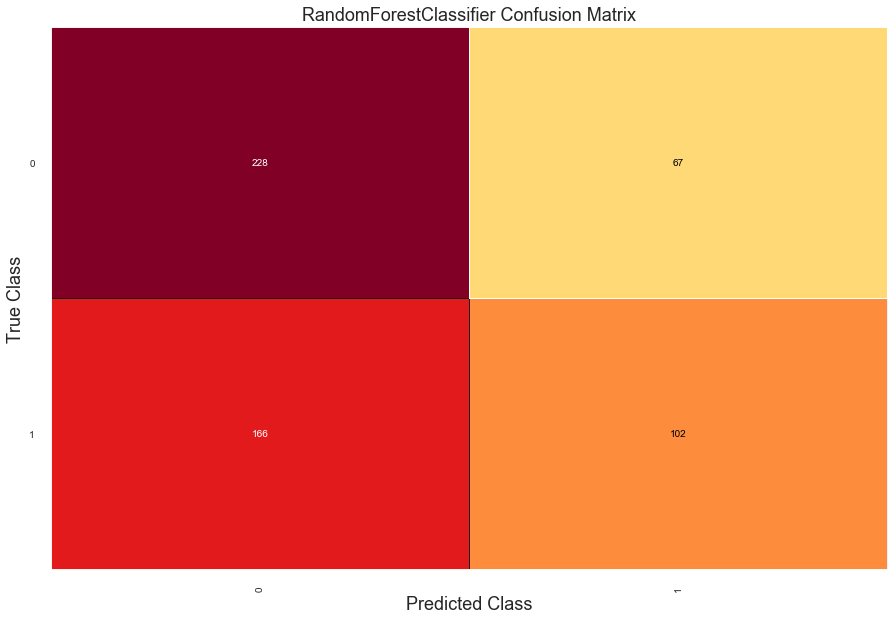

In [68]:
plt.figure(figsize=(15,10))
cm = ConfusionMatrix(clf)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_pca_test, y_test)

# How did we do?
cm.poof()

In [69]:
accuracy_score(y_test, y_pred)

0.5861456483126111

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.77      0.66       295
           1       0.60      0.38      0.47       268

    accuracy                           0.59       563
   macro avg       0.59      0.58      0.56       563
weighted avg       0.59      0.59      0.57       563



In [49]:
steps = [('forest', RandomForestClassifier())]
pipe = Pipeline(steps=steps)

grid = {'forest__n_estimators': list(np.arange(1, 300, 20)),
        'forest__criterion': ['gini', 'entropy'],
        'forest__max_depth': list(np.arange(1, 7, 1)),
        'forest__max_leaf_nodes': list(np.arange(2, 100, 10)),
        'forest__random_state' : [0]}

gs = GridSearchCV(pipe, grid, cv=5, scoring='accuracy')


gs.fit(X_train_scaled, y_train)
gs.score(X_test_scaled, y_test)
gs.best_params_

{'forest__criterion': 'entropy',
 'forest__max_depth': 6,
 'forest__max_leaf_nodes': 52,
 'forest__n_estimators': 221,
 'forest__random_state': 0}

In [71]:
# First running a random forest on our actual data
clf = RandomForestClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=52, n_estimators=221)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [72]:
accuracy_score(y_test, y_pred)

0.7460035523978685

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       295
           1       0.74      0.73      0.73       268

    accuracy                           0.75       563
   macro avg       0.75      0.75      0.75       563
weighted avg       0.75      0.75      0.75       563



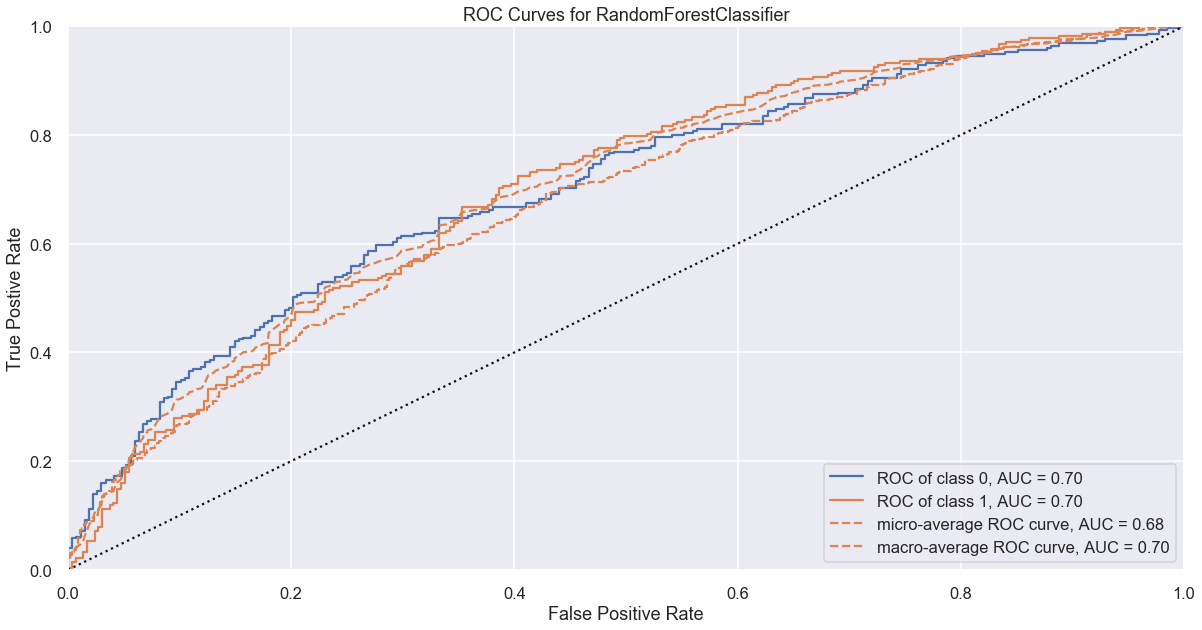

In [74]:
# Instantiate the visualizer with the classification model
plt.figure(figsize=(20,10))
visualizer = ROCAUC(clf)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.poof() 

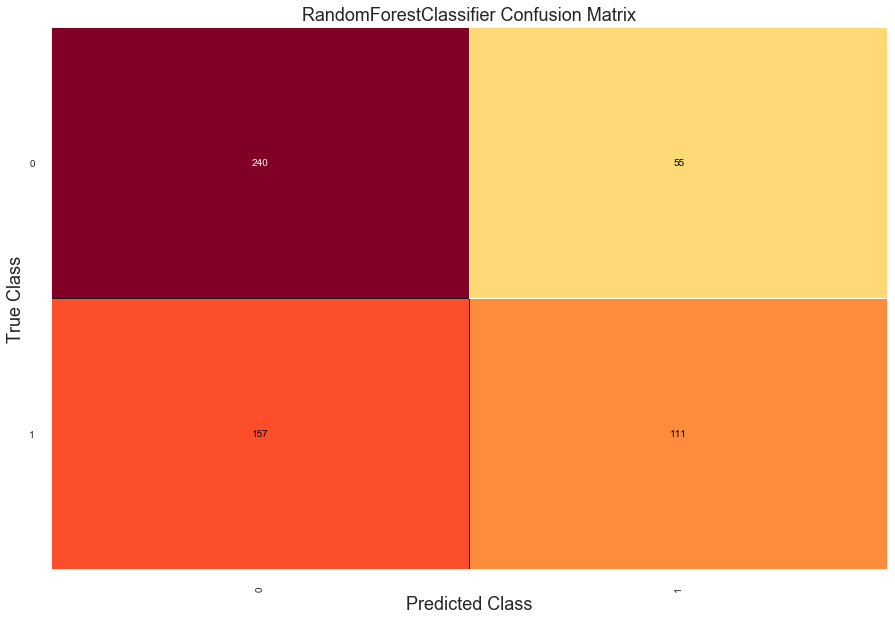

In [75]:
plt.figure(figsize=(15,10))
cm = ConfusionMatrix(clf)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()